<a href="https://colab.research.google.com/github/viraj308/particle_classification/blob/main/Magic_fcc_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1","fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

df = pd.read_csv("/content/drive/MyDrive/magic+gamma+telescope/magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df['class'] = (df['class'] == 'g').astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

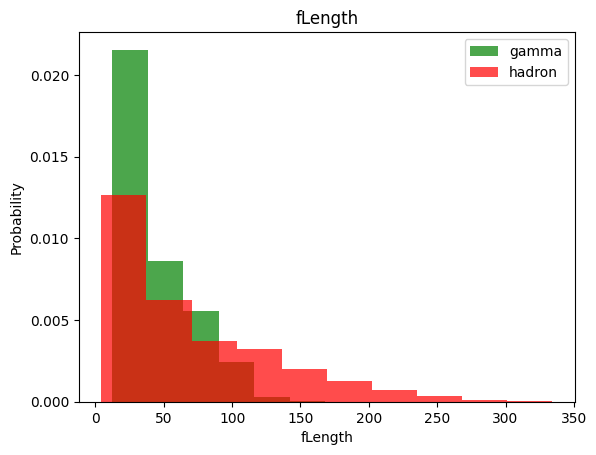

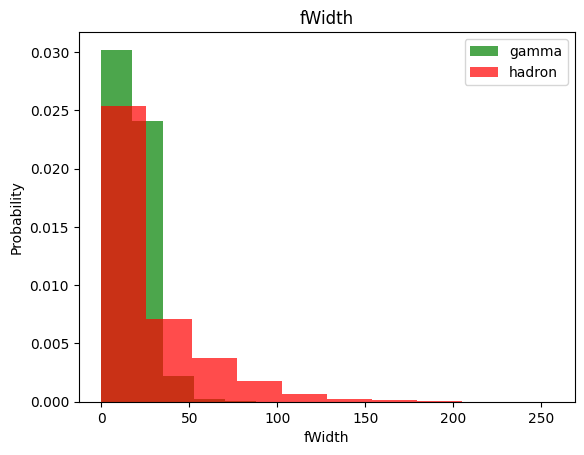

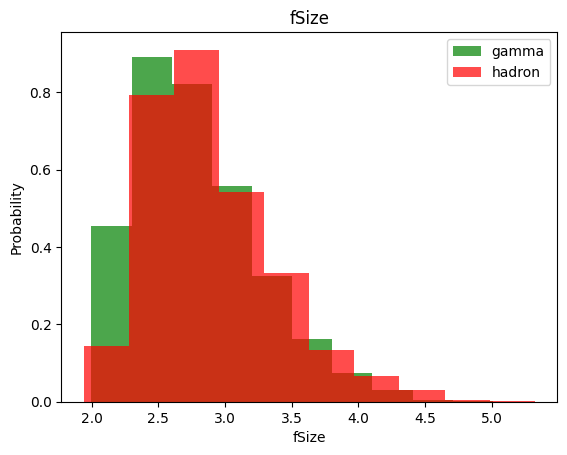

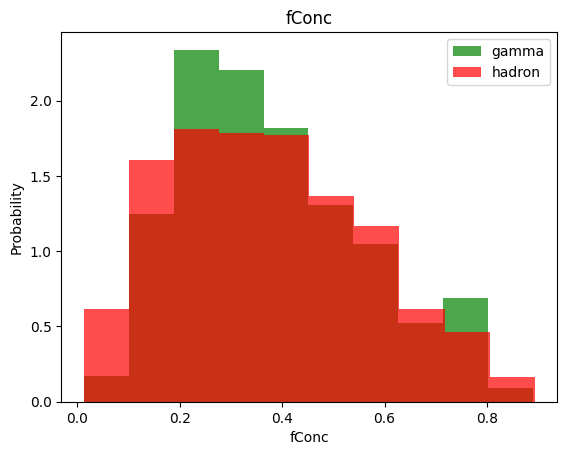

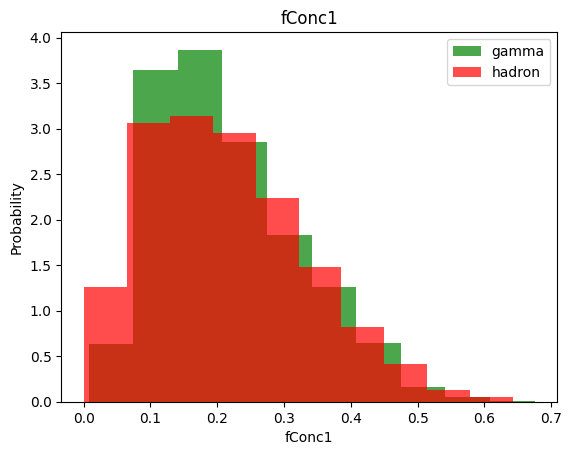

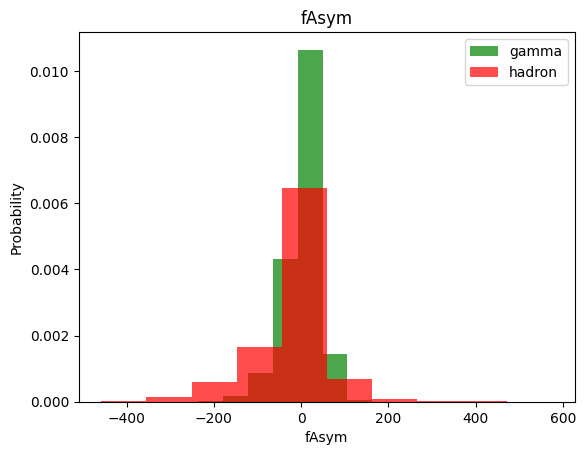

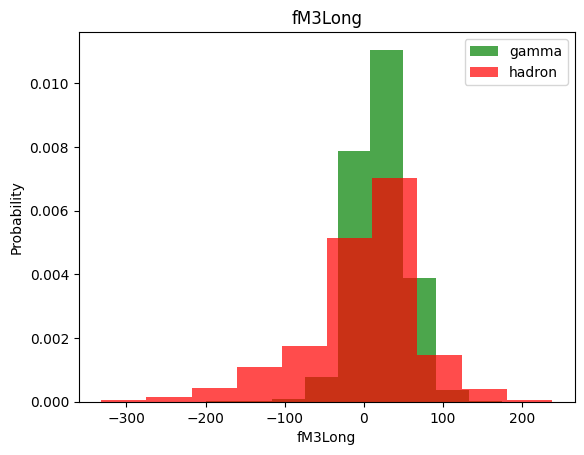

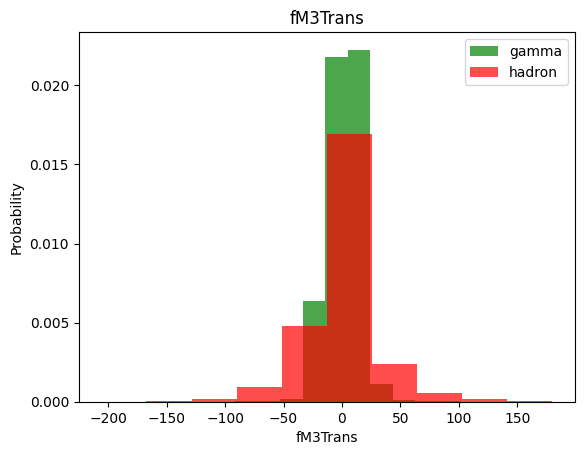

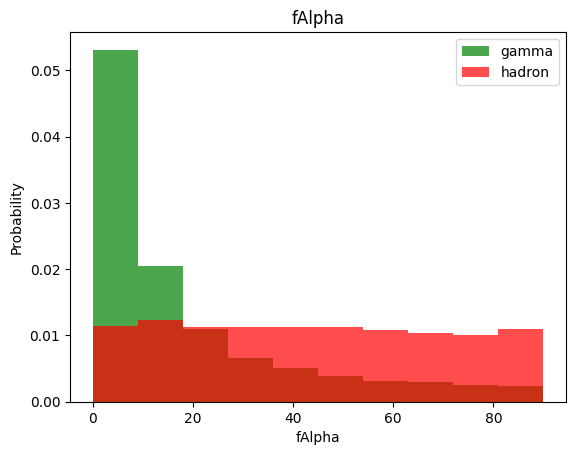

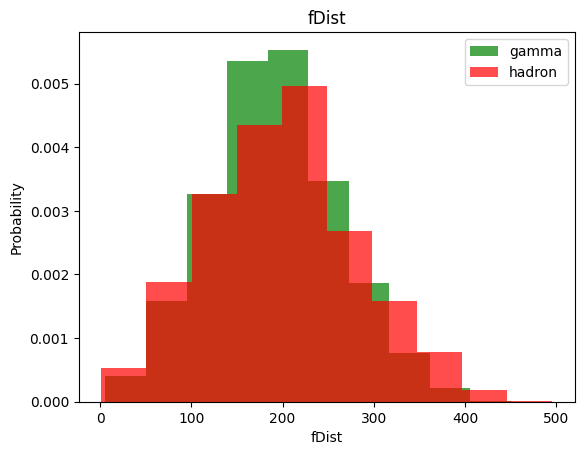

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color="green",label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color="red",label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, Validation and Test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
train.head()

fLength   fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
17257   22.2431  10.8532  2.5321  0.6432  0.3627   23.6775  14.9856   -7.2004   
6004    18.5317  10.3781  2.2041  0.5750  0.3094  -23.3881  -9.7754    4.3266   
7252    12.8875  11.4113  2.0512  0.7378  0.3867   15.0852  -5.7947   11.5476   
7939   112.9480  39.3367  3.2619  0.1335  0.0670  137.9480  80.0759  -18.3524   
14672   23.1649  16.3238  2.6893  0.4438  0.2832  -19.9288   3.7574   12.9700   

        fAlpha    fDist  class  
17257  80.3583  253.204      0  
6004   26.6697  205.578      1  
7252   70.0590  136.703      1  
7939    0.9380  197.973      1  
14672  12.9680  243.848      0

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
print(sum(train["class"] == 1)) # gamma
print(sum(train["class"] == 0)) # hadron

7409
4003


In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)
print(sum(y_train == 1))
print(sum(y_train == 0))

7409
7409


#kNN (k Nearest Neighbors)

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.40      0.51      1339
           1       0.74      0.91      0.81      2465

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.73      0.73      0.71      3804



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)

In [ ]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1339
           1       0.84      0.82      0.83      2465

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM (Simple Vector Machine)


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1339
           1       0.89      0.89      0.89      2465

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label="loss")
  ax1.plot(history.history['val_loss'], label="val_loss")
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label="accuracy")
  ax2.plot(history.history['val_accuracy'], label="val_accuracy")
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10, )),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation="sigmoid"),
 ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy", metrics=["accuracy"])

  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
 )
  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 32


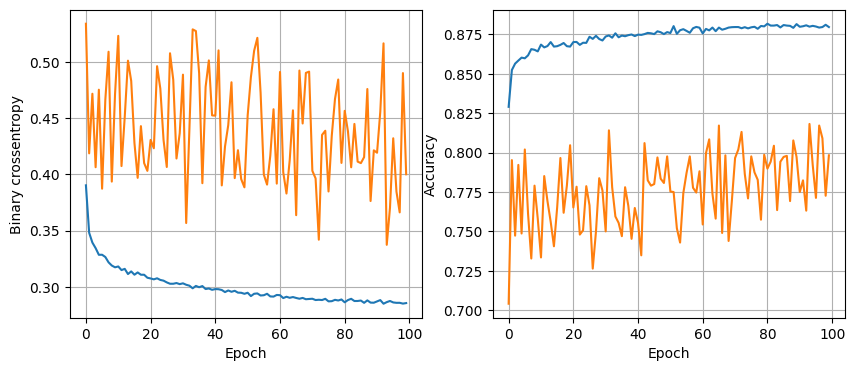

119/119 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8778
16 nodes, dropout 0, lr 0.01, batch_size 64


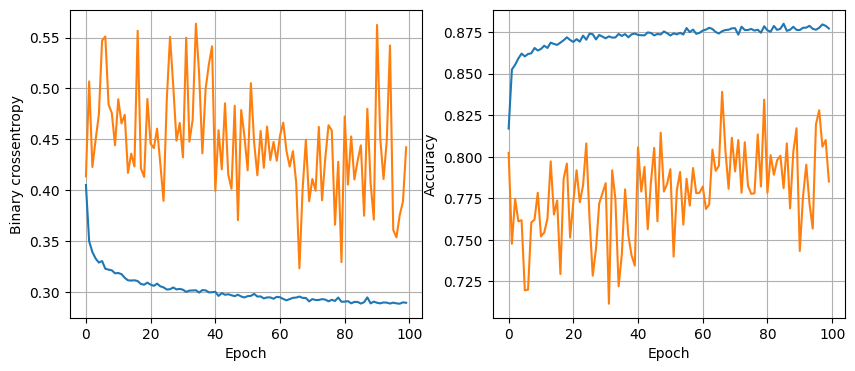

119/119 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8704
16 nodes, dropout 0, lr 0.01, batch_size 128


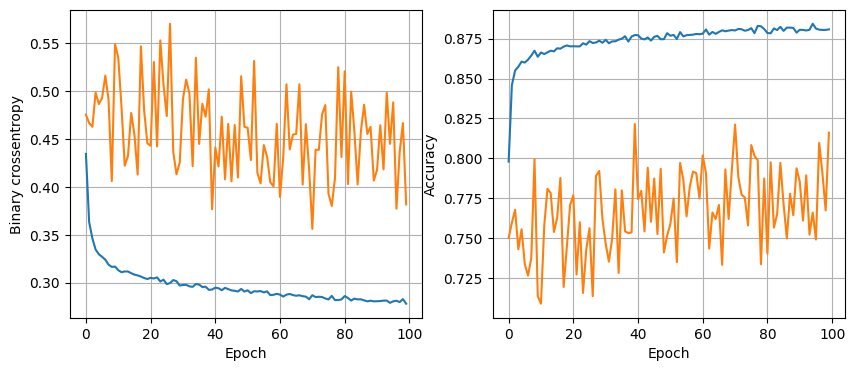

119/119 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8617
16 nodes, dropout 0, lr 0.005, batch_size 32


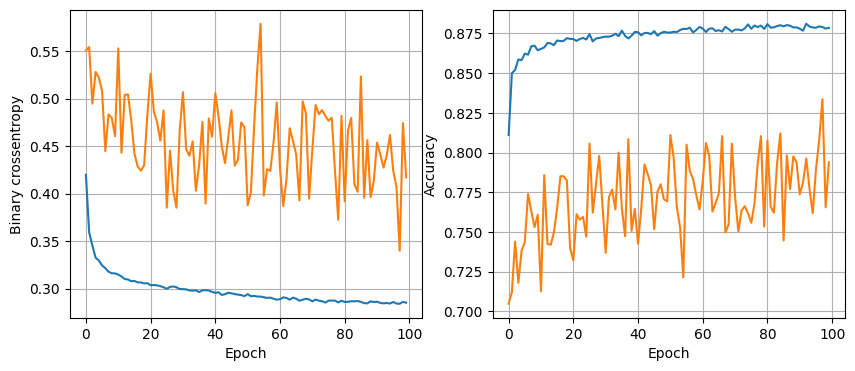

119/119 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8712
16 nodes, dropout 0, lr 0.005, batch_size 64


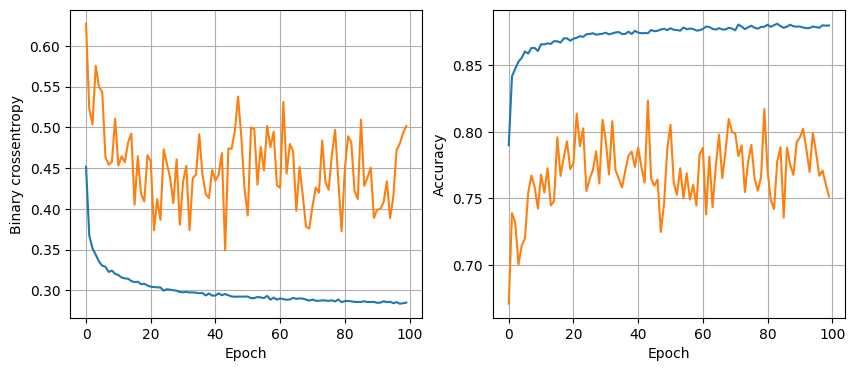

119/119 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8712
16 nodes, dropout 0, lr 0.005, batch_size 128


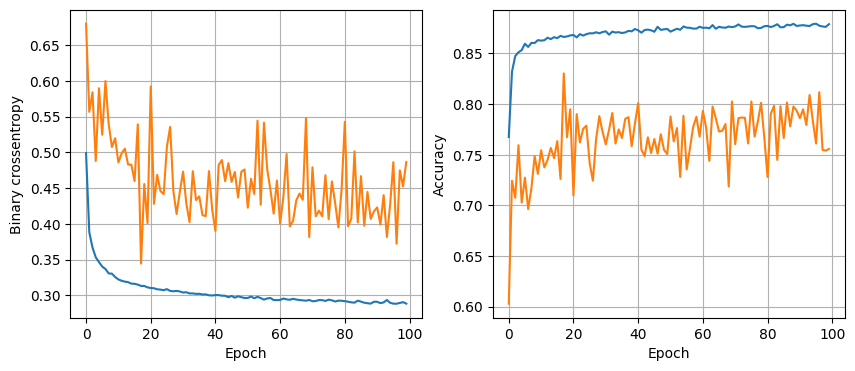

119/119 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8767
16 nodes, dropout 0, lr 0.001, batch_size 32


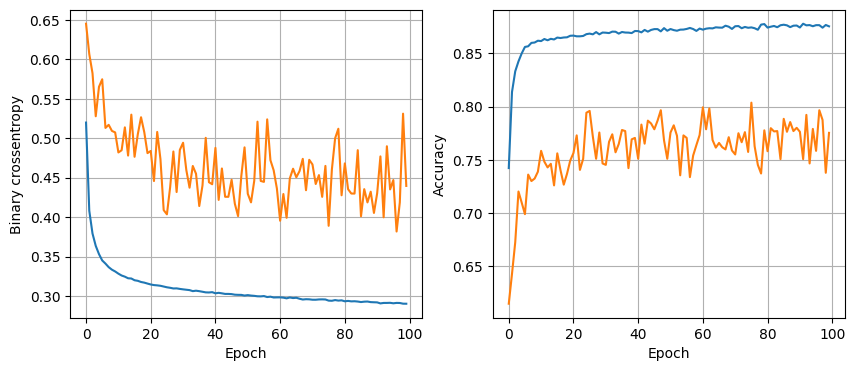

119/119 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.8754
16 nodes, dropout 0, lr 0.001, batch_size 64


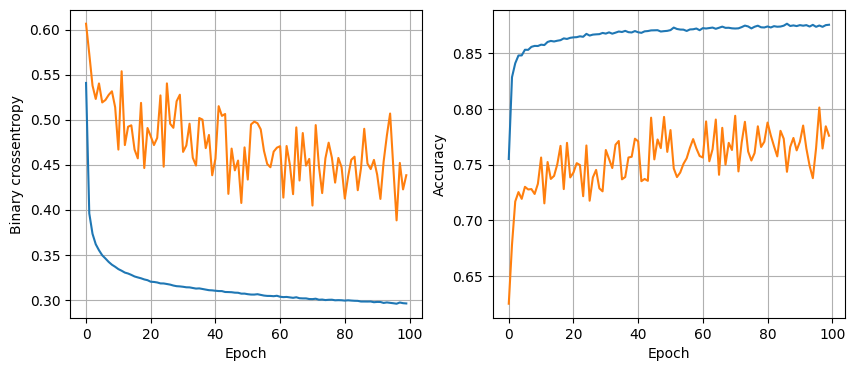

119/119 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8717
16 nodes, dropout 0, lr 0.001, batch_size 128


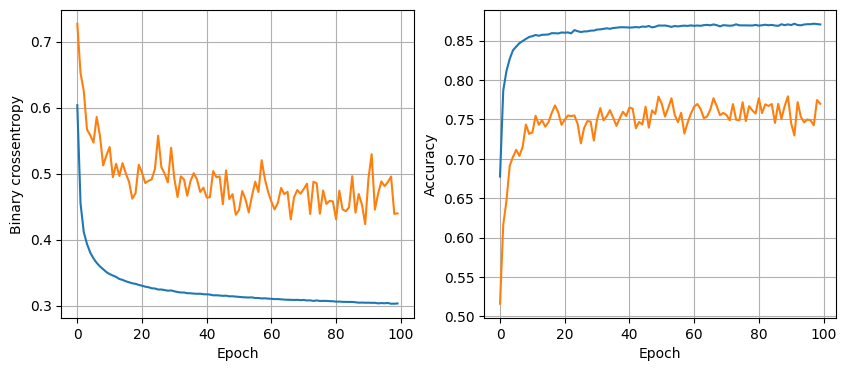

119/119 [==============================] - 0s 3ms/step - loss: 0.3097 - accuracy: 0.8730
16 nodes, dropout 0.2, lr 0.01, batch_size 32


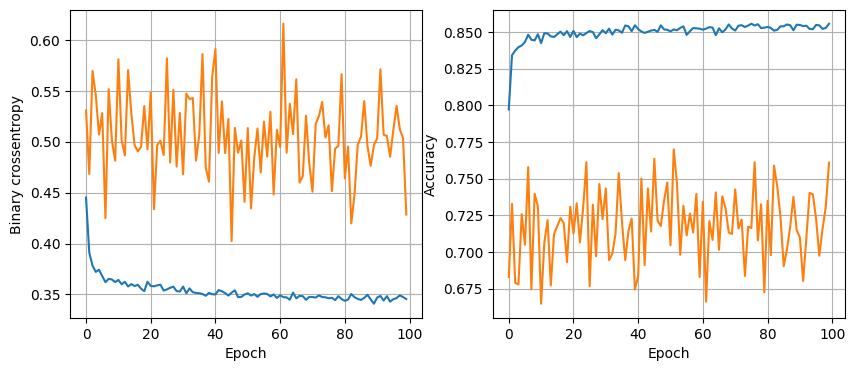

119/119 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8707
16 nodes, dropout 0.2, lr 0.01, batch_size 64


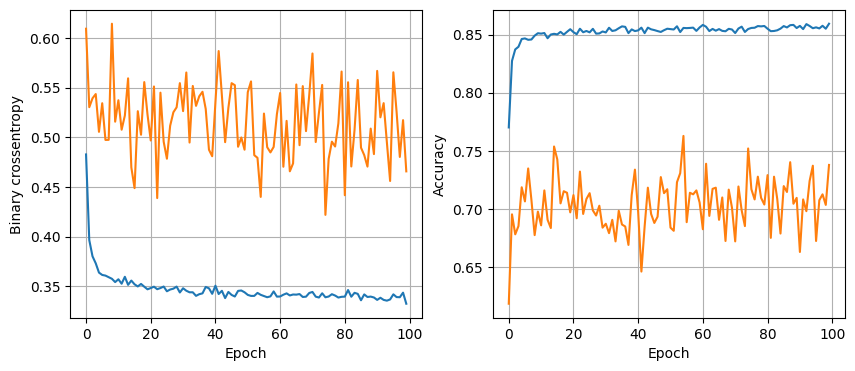

119/119 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8741
16 nodes, dropout 0.2, lr 0.01, batch_size 128


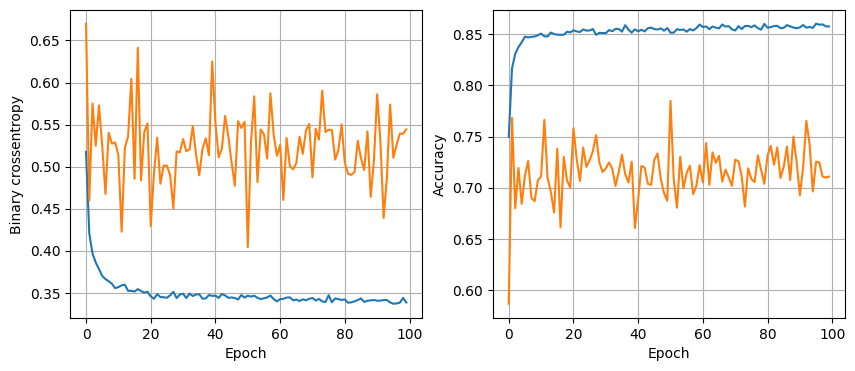

119/119 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.8746
16 nodes, dropout 0.2, lr 0.005, batch_size 32


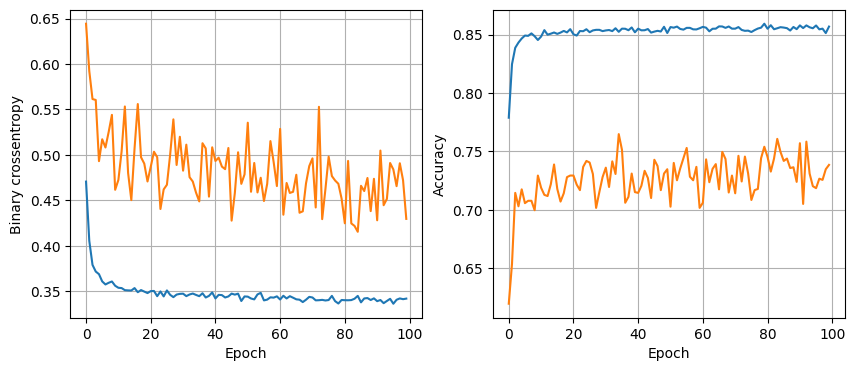

119/119 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8712
16 nodes, dropout 0.2, lr 0.005, batch_size 64


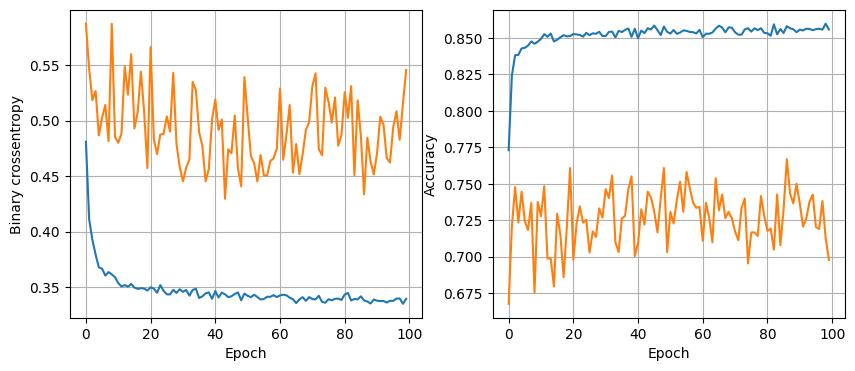

119/119 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8667
16 nodes, dropout 0.2, lr 0.005, batch_size 128


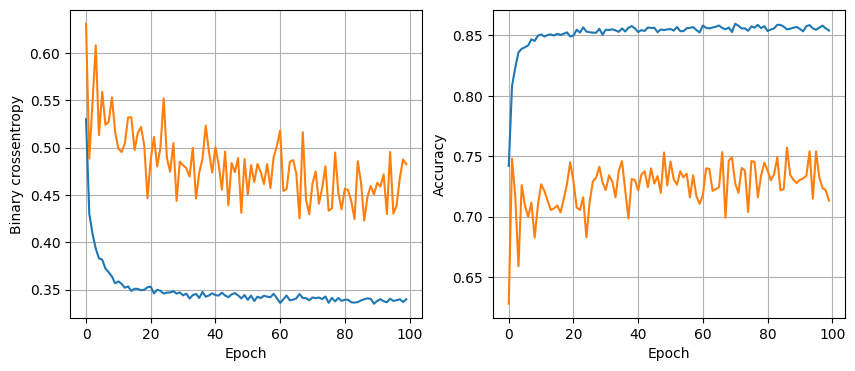

119/119 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8715
16 nodes, dropout 0.2, lr 0.001, batch_size 32


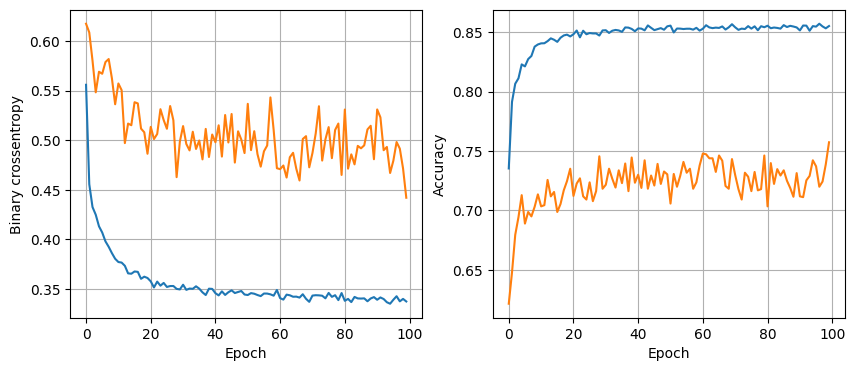

119/119 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8665
16 nodes, dropout 0.2, lr 0.001, batch_size 64


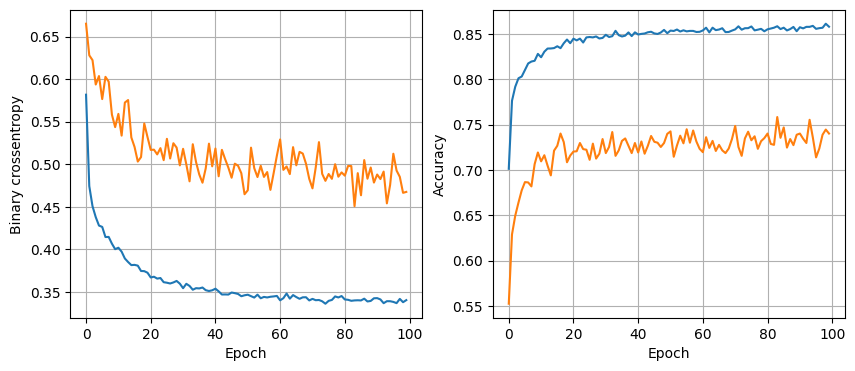

119/119 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8725
16 nodes, dropout 0.2, lr 0.001, batch_size 128


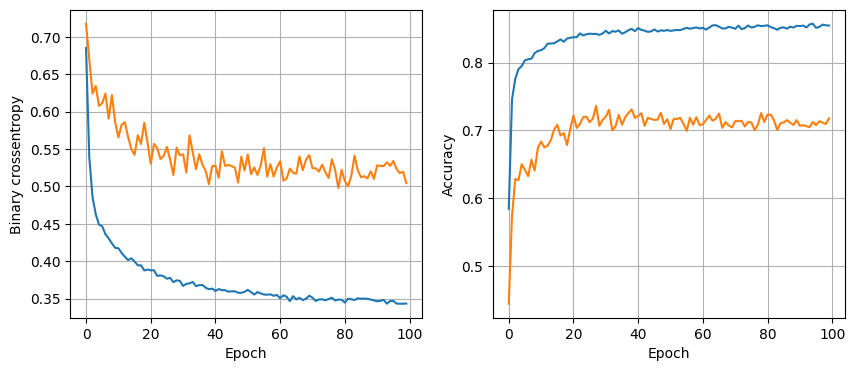

119/119 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8696
32 nodes, dropout 0, lr 0.01, batch_size 32


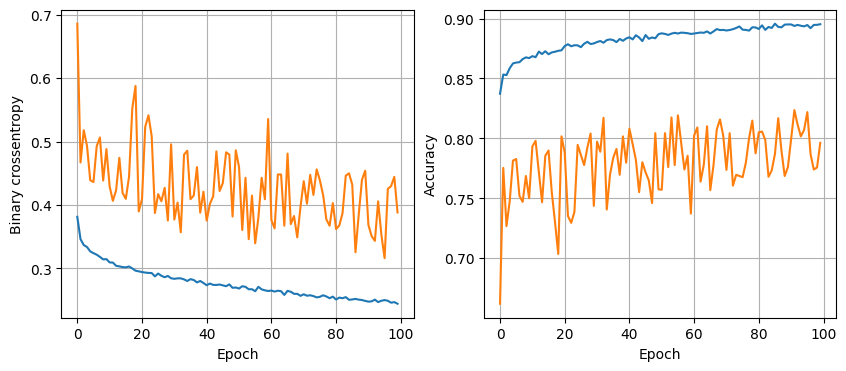

119/119 [==============================] - 0s 3ms/step - loss: 0.3489 - accuracy: 0.8691
32 nodes, dropout 0, lr 0.01, batch_size 64


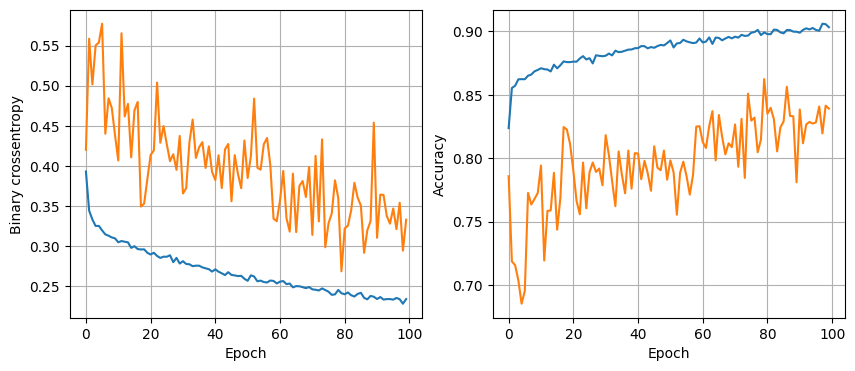

119/119 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8672
32 nodes, dropout 0, lr 0.01, batch_size 128


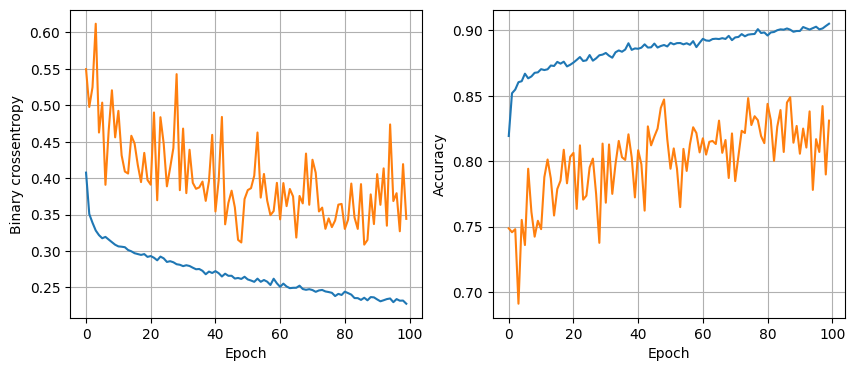

119/119 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.005, batch_size 32


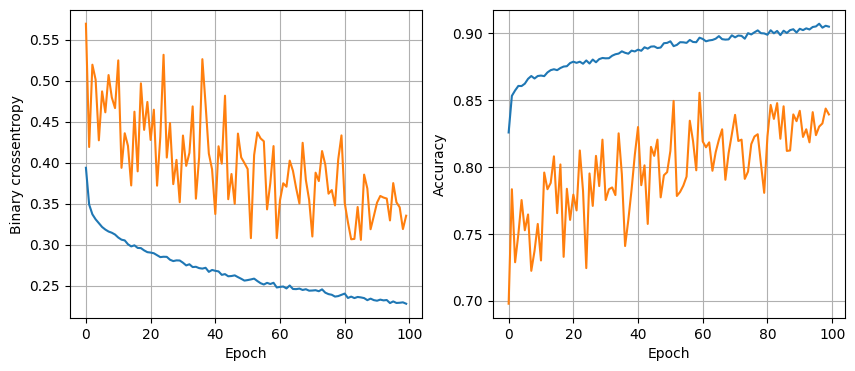

119/119 [==============================] - 0s 3ms/step - loss: 0.3731 - accuracy: 0.8659
32 nodes, dropout 0, lr 0.005, batch_size 64


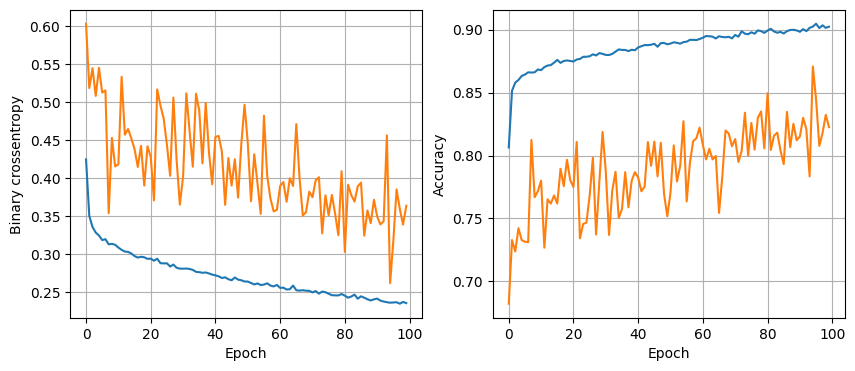

119/119 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.005, batch_size 128


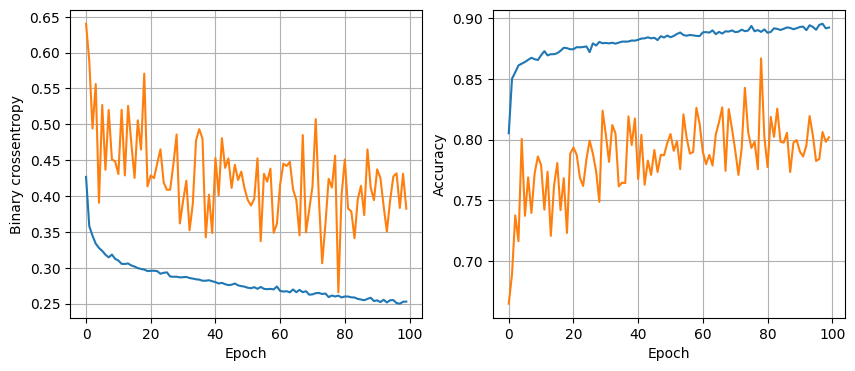

119/119 [==============================] - 0s 3ms/step - loss: 0.3222 - accuracy: 0.8709
32 nodes, dropout 0, lr 0.001, batch_size 32


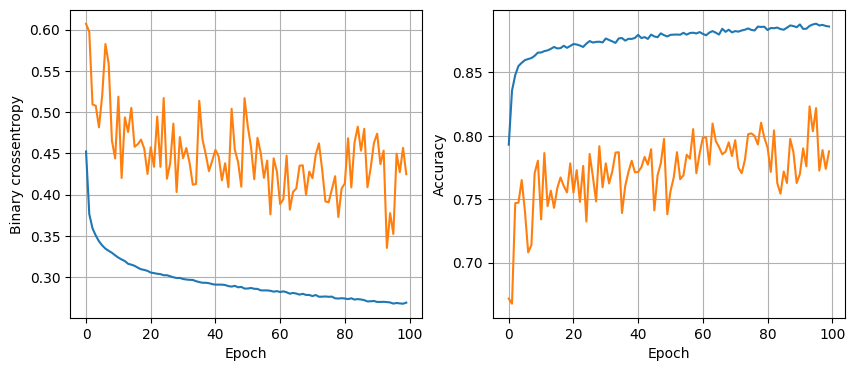

119/119 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8680
32 nodes, dropout 0, lr 0.001, batch_size 64


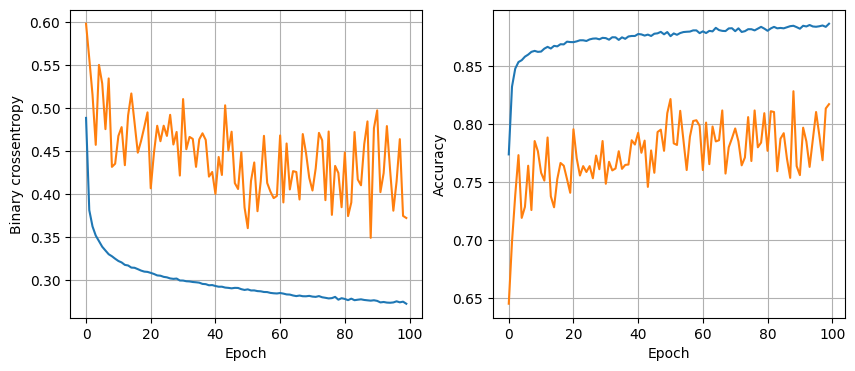

119/119 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8678
32 nodes, dropout 0, lr 0.001, batch_size 128


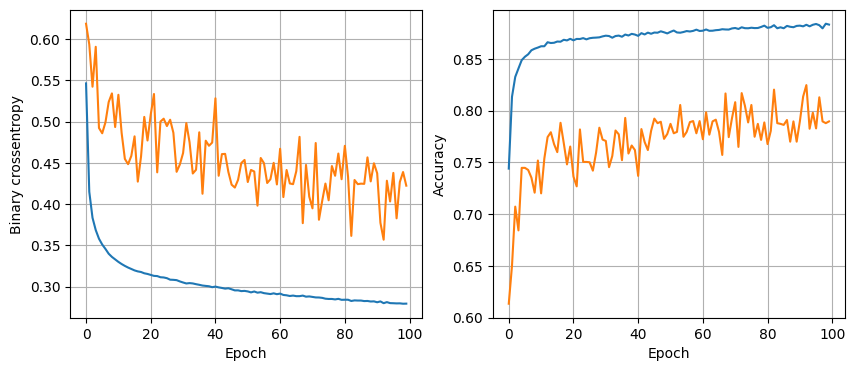

119/119 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8751
32 nodes, dropout 0.2, lr 0.01, batch_size 32


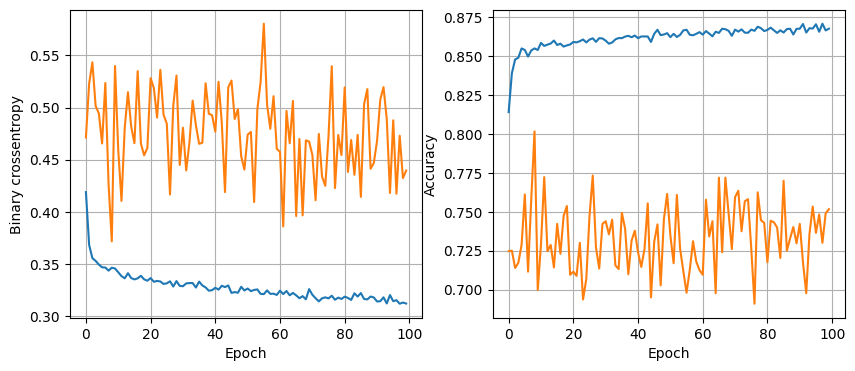

119/119 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8767
32 nodes, dropout 0.2, lr 0.01, batch_size 64


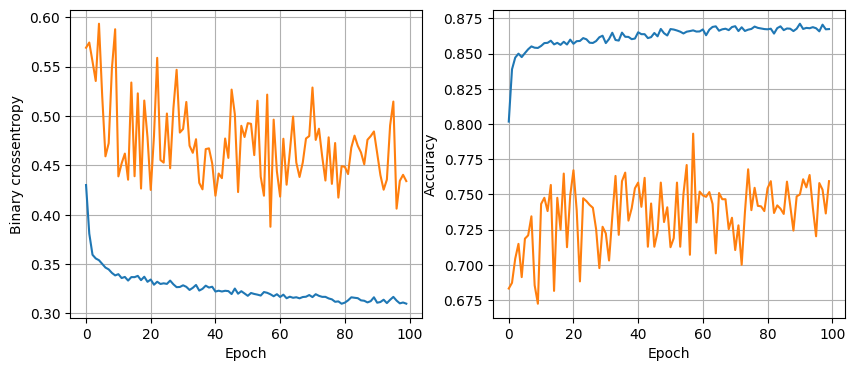

119/119 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.8730
32 nodes, dropout 0.2, lr 0.01, batch_size 128


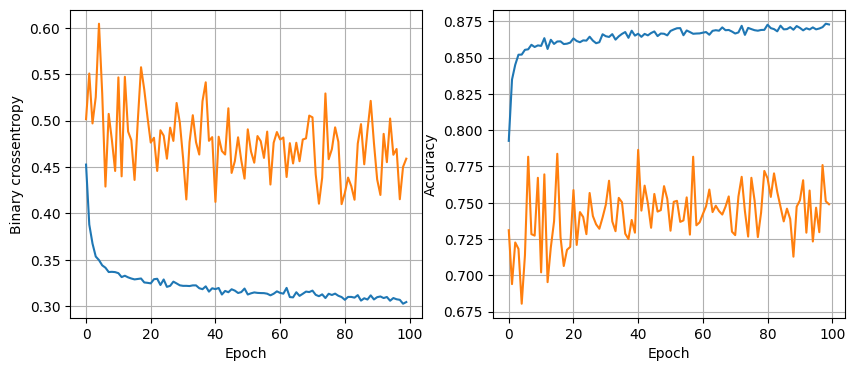

119/119 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8788
32 nodes, dropout 0.2, lr 0.005, batch_size 32


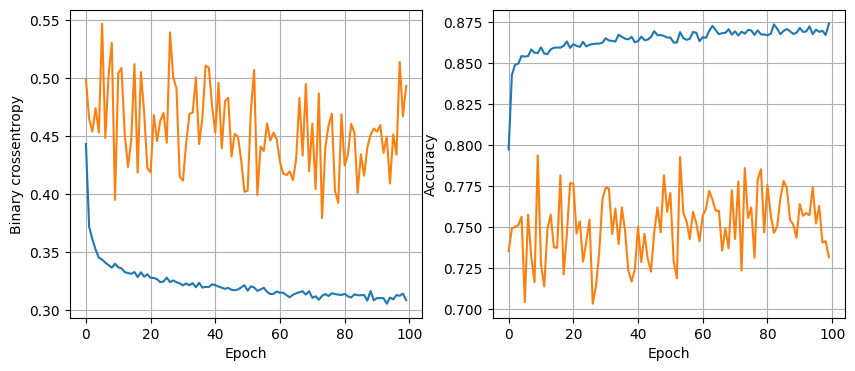

119/119 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.8780
32 nodes, dropout 0.2, lr 0.005, batch_size 64


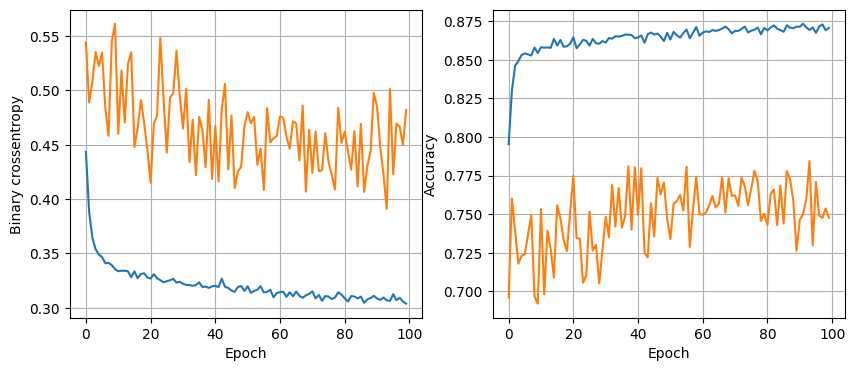

119/119 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8807
32 nodes, dropout 0.2, lr 0.005, batch_size 128


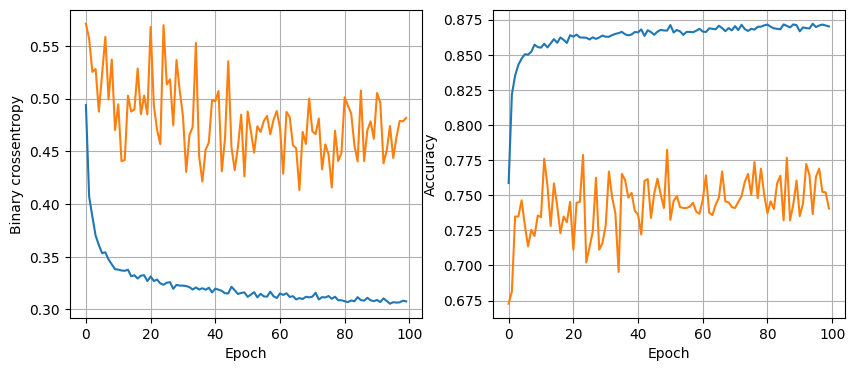

119/119 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8772
32 nodes, dropout 0.2, lr 0.001, batch_size 32


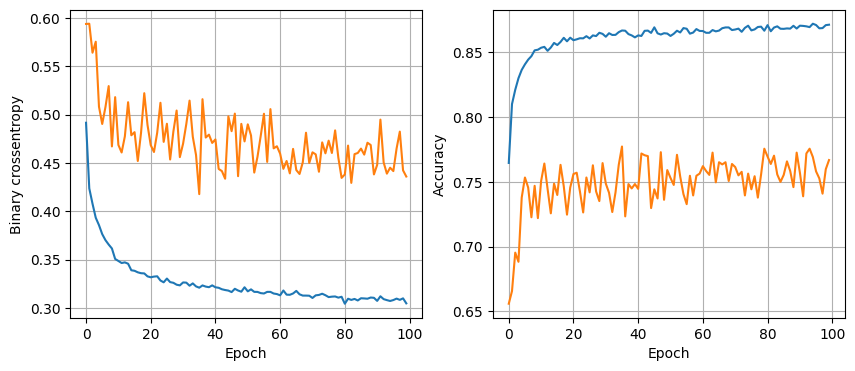

119/119 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.8785
32 nodes, dropout 0.2, lr 0.001, batch_size 64


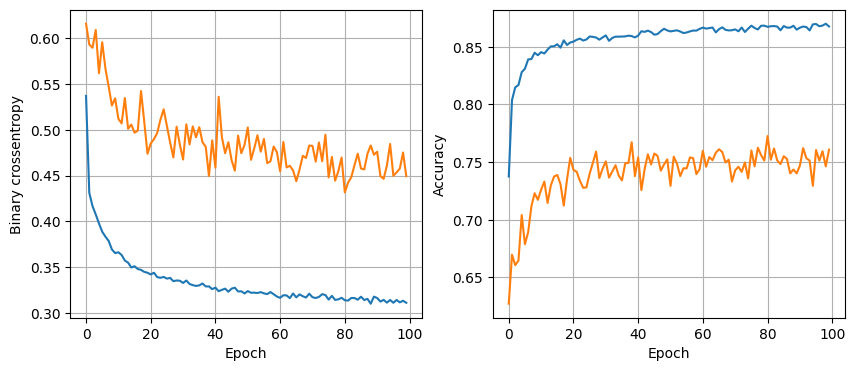

119/119 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8722
32 nodes, dropout 0.2, lr 0.001, batch_size 128


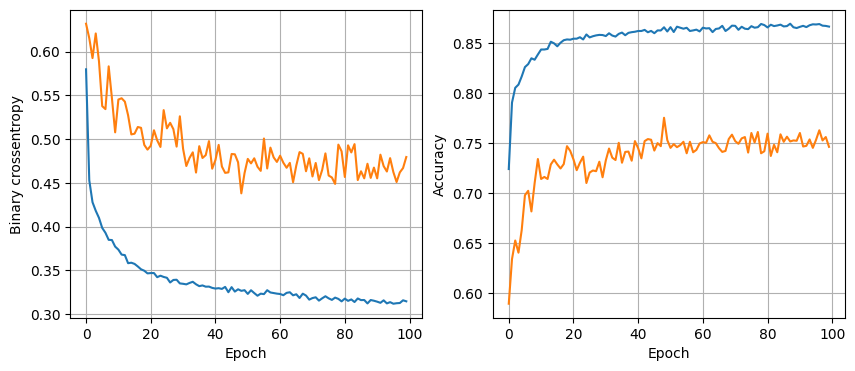

119/119 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8738
64 nodes, dropout 0, lr 0.01, batch_size 32


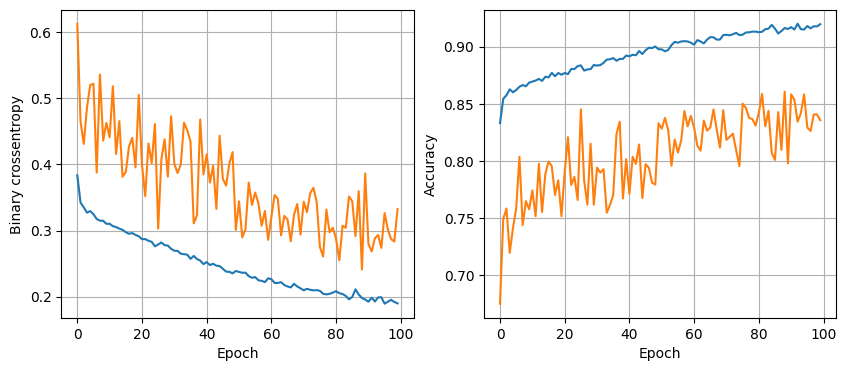

119/119 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.8601
64 nodes, dropout 0, lr 0.01, batch_size 64


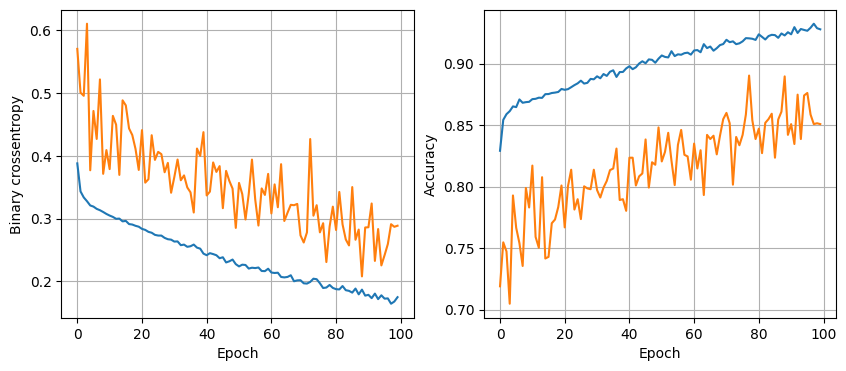

119/119 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.8588
64 nodes, dropout 0, lr 0.01, batch_size 128


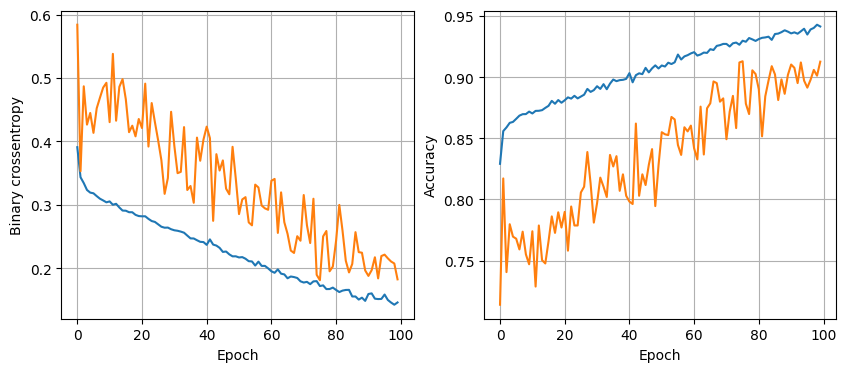

119/119 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.8517
64 nodes, dropout 0, lr 0.005, batch_size 32


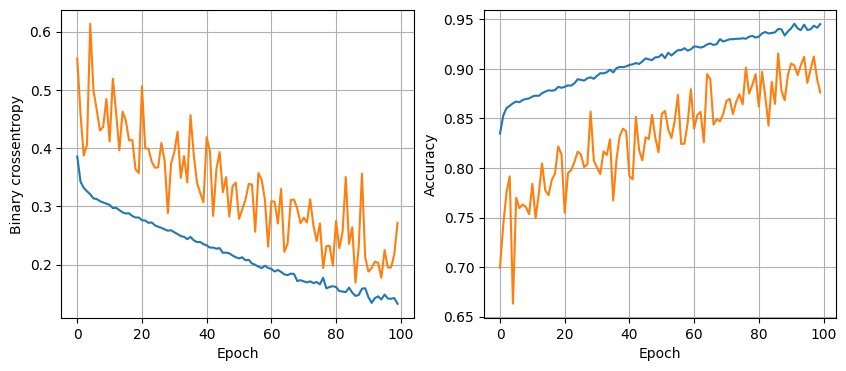

119/119 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.8544
64 nodes, dropout 0, lr 0.005, batch_size 64


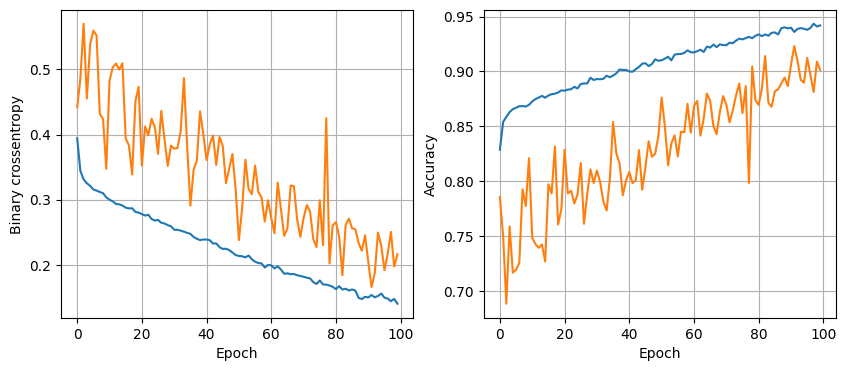

119/119 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.8488
64 nodes, dropout 0, lr 0.005, batch_size 128


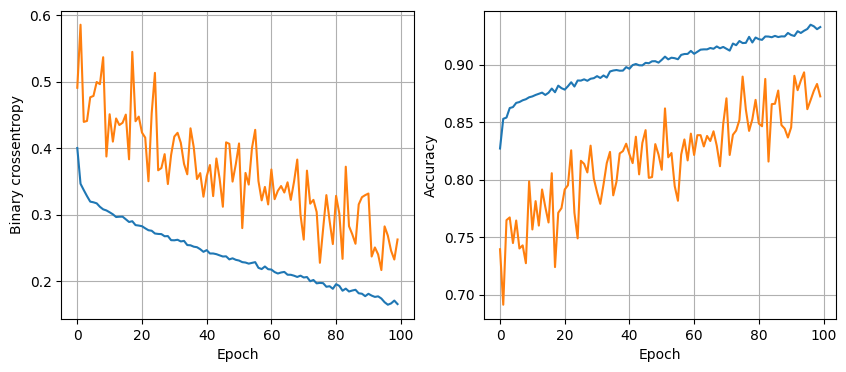

119/119 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.8567
64 nodes, dropout 0, lr 0.001, batch_size 32


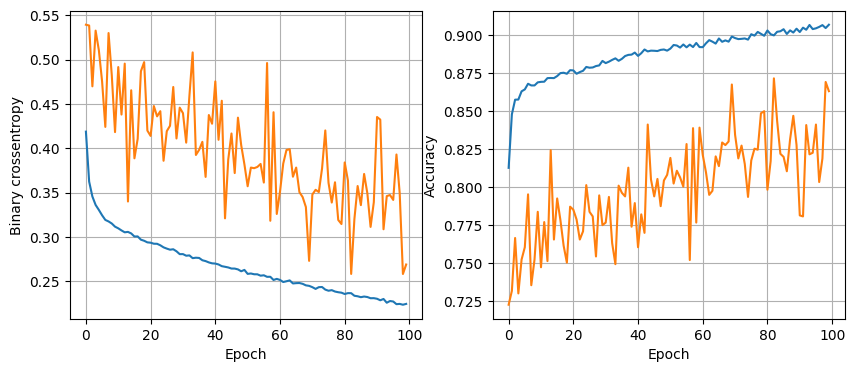

119/119 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8633
64 nodes, dropout 0, lr 0.001, batch_size 64


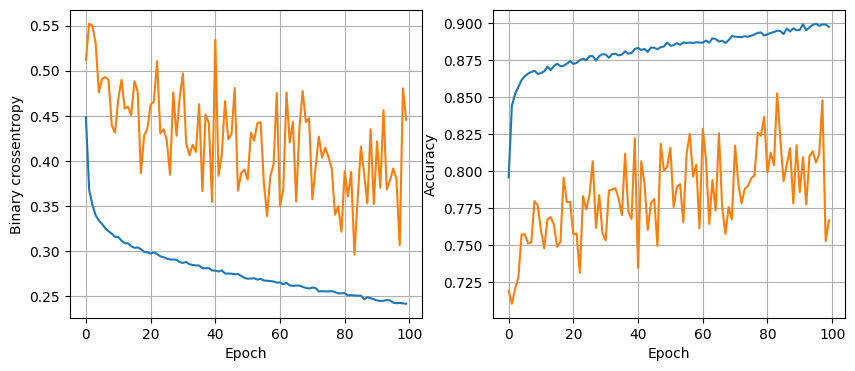

119/119 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8686
64 nodes, dropout 0, lr 0.001, batch_size 128


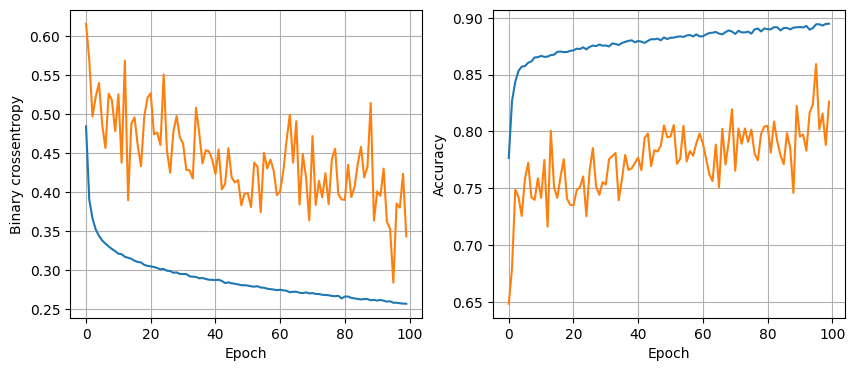

119/119 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.01, batch_size 32


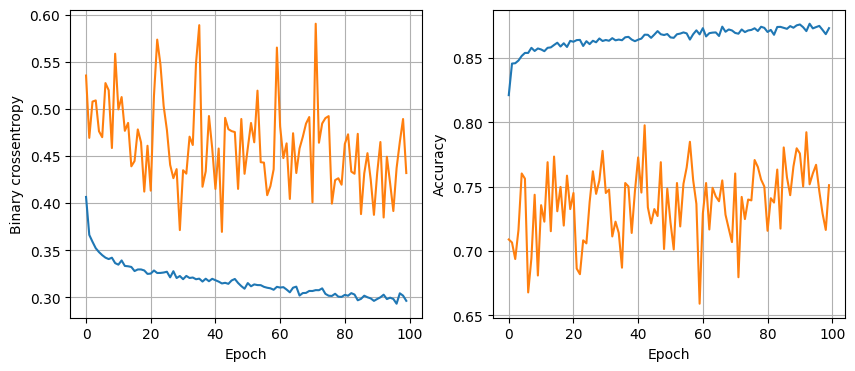

119/119 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8772
64 nodes, dropout 0.2, lr 0.01, batch_size 64


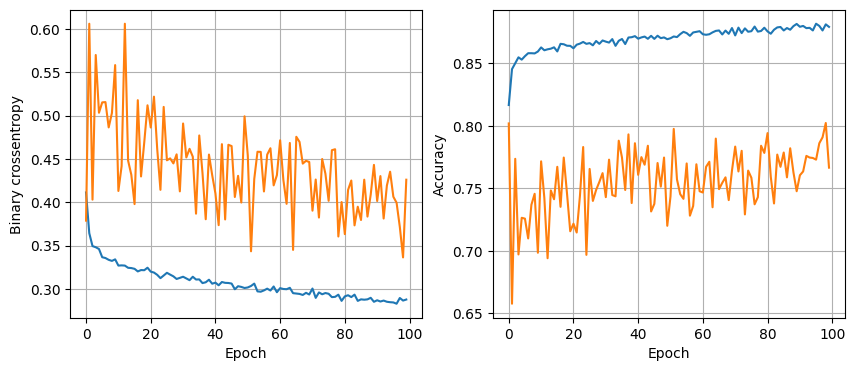

119/119 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.8793
64 nodes, dropout 0.2, lr 0.01, batch_size 128


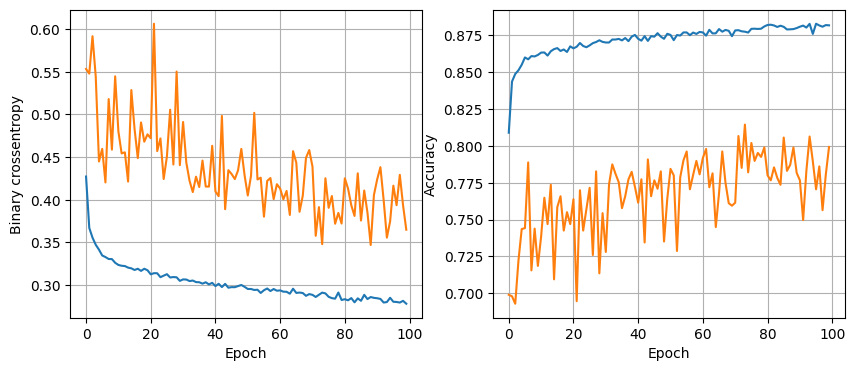

119/119 [==============================] - 0s 2ms/step - loss: 0.2972 - accuracy: 0.8780
64 nodes, dropout 0.2, lr 0.005, batch_size 32


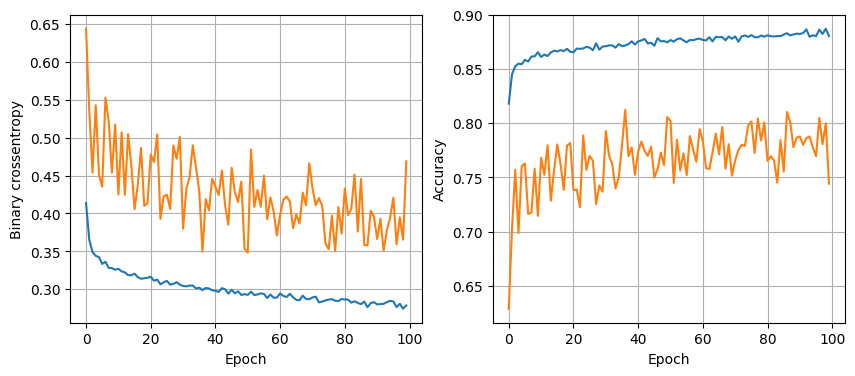

119/119 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8780
64 nodes, dropout 0.2, lr 0.005, batch_size 64


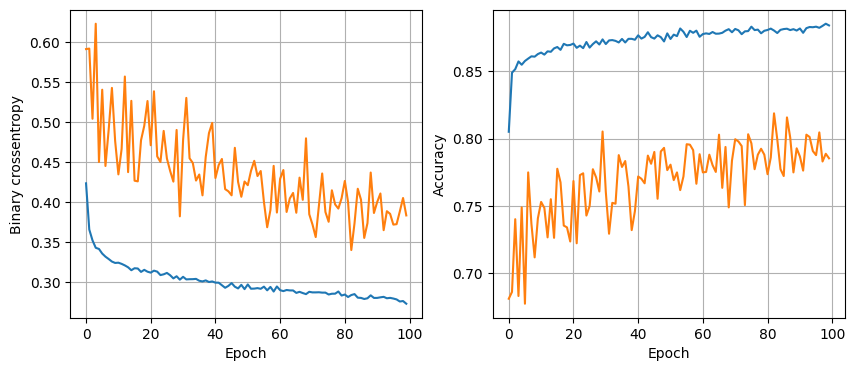

119/119 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8814
64 nodes, dropout 0.2, lr 0.005, batch_size 128


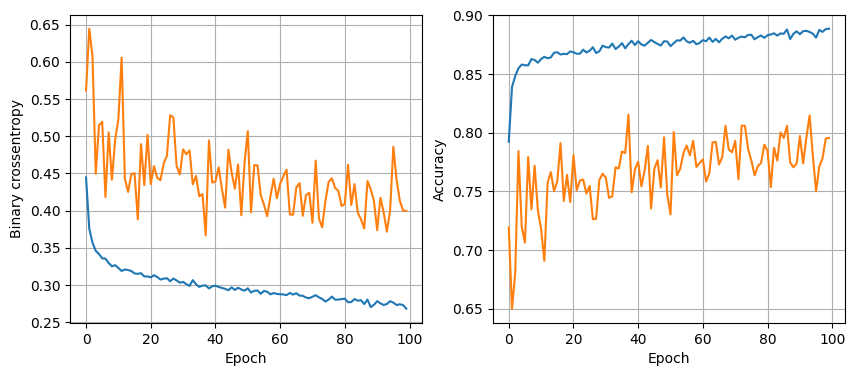

119/119 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8830
64 nodes, dropout 0.2, lr 0.001, batch_size 32


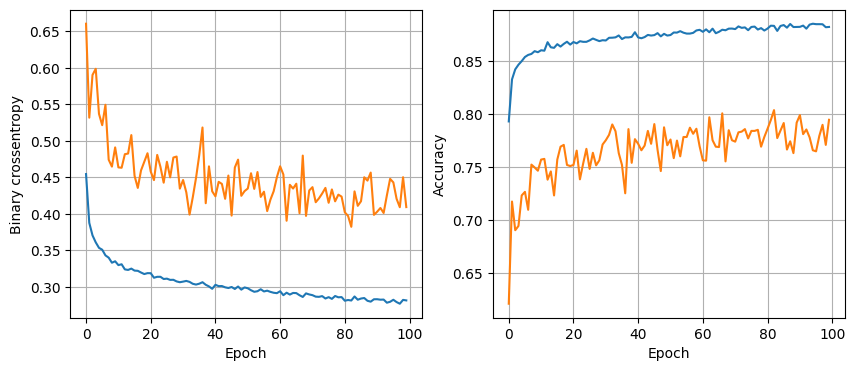

119/119 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.8778
64 nodes, dropout 0.2, lr 0.001, batch_size 64


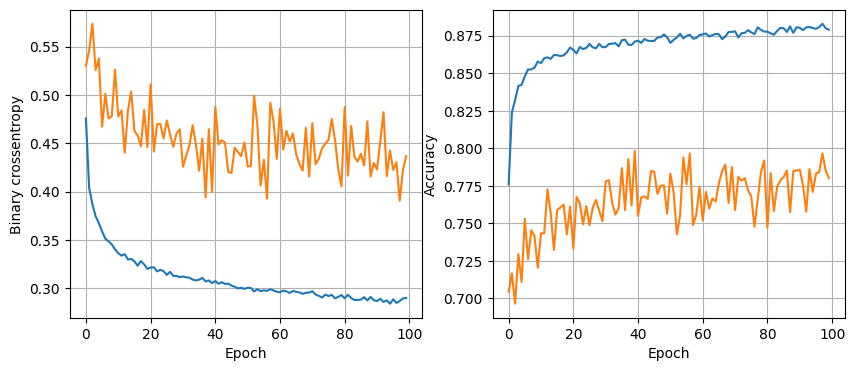

119/119 [==============================] - 0s 2ms/step - loss: 0.2924 - accuracy: 0.8741
64 nodes, dropout 0.2, lr 0.001, batch_size 128


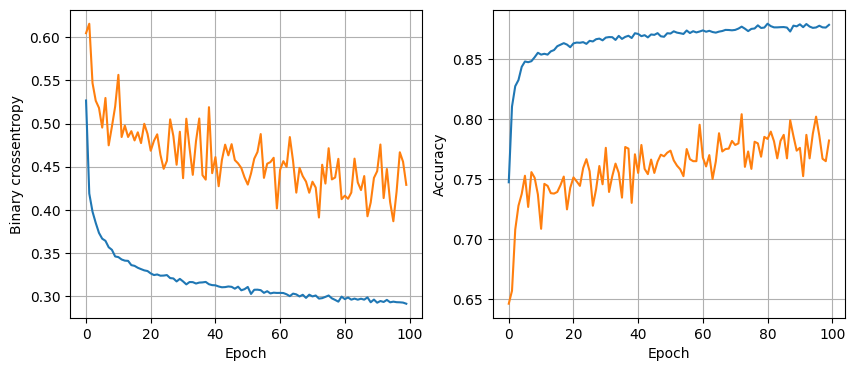

119/119 [==============================] - 0s 3ms/step - loss: 0.2965 - accuracy: 0.8783


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 1s 3ms/step


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1339
           1       0.88      0.93      0.90      2465

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

